In [67]:
# # from keras.datasets import mnist
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.datasets import load_iris

# from google.colab import drive
# drive.mount('/content/drive')

In [68]:
# path = '/content/drive/MyDrive/explo_2/train.csv'

# # data_ =pd.read_csv('forestfires.csv')


# X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [69]:
# display(X_train.info())
# display(X_test.info())
# display(X_train.head(n = 2))
# display(X_test.head(n = 2))

In [70]:
# X_train = np.array(X_train.iloc[:,:])
# X_train = np.array([np.reshape(i, (28,28)) for i in X_train])
# X_test = np.array(X_test.iloc[:,:])
# X_test = np.array([np.reshape(i, (28,28)) for i in X_test])num_classes = 26
# y_train = np.array(y_train).reshape(-1)
# y_test = np.array(y_test).reshape(-1)y_train = np.eye(num_classes)[y_train]
# y_test = np.eye(num_classes)[y_test]X_train = X_train.reshape((27455, 28, 28, 1))
# X_test = X_test.reshape((7172, 28, 28, 1))

In [71]:
# classifier = Sequential()
# classifier.add(Conv2D(filters=8, kernel_size=(3,3),strides=(1,1),padding='same',input_shape=(28,28,1),activation='relu', data_format='channels_last'))
# classifier.add(MaxPooling2D(pool_size=(2,2)))
# classifier.add(Conv2D(filters=16, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
# classifier.add(Dropout(0.5))<br>classifier.add(MaxPooling2D(pool_size=(4,4)))
# classifier.add(Dense(128, activation='relu'))<br>classifier.add(Flatten())
# classifier.add(Dense(26, activation='softmax'))

In [72]:
# classifier.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
# classifier.fit(X_train, y_train, epochs=50, batch_size=100)

In [73]:
# accuracy = classifier.evaluate(x=X_test,y=y_test,batch_size=32)
# print("Accuracy: ",accuracy[1])

In [74]:
# classifier.save('CNNmodel.h5')
# weights_file = drive.CreateFile({'title' : 'CNNmodel.h5'})
# weights_file.SetContentFile('CNNmodel.h5')<br>weights_file.Upload()
# drive.CreateFile({'id': weights_file.get('id')})

In [75]:
# def main():
#     while True:  

#        # capturing the image from webcam 
#        cam_capture = cv2.VideoCapture(0)
#        _, image_frame = cam_capture.read()
  
#        # to crop required part
#        im2 = crop_image(image_frame, 300,300,300,300)

#        # convert to grayscale 
#        image_grayscale = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
    
#        # blurring the image 
#        image_grayscale_blurred =cv2.GaussianBlur(image_grayscale, (15,15), 0)

#        # resize the image to 28x28
#        im3 = cv2.resize(image_grayscale_blurred, (28,28), interpolation = cv2.INTER_AREA)

#        # expand the dimensions from 28x28 to 1x28x28x1
#        im4 = np.resize(im3, (28, 28, 1))
#        im5 = np.expand_dims(im4, axis=0)

In [76]:
# def keras_predict(model, image):
#     data = np.asarray( image, dtype="int32" )
#     pred_probab = model.predict(data)[0]
    
#     # softmax gives probability for all the alphabets hence we have to choose the maximum probability alphabet 
#     pred_class = list(pred_probab).index(max(pred_probab))
#     return max(pred_probab), pred_class

In [77]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
from IPython.display import Image, display, Markdown
import matplotlib.cm as cm
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from time import perf_counter
import seaborn as sns

def printmd(string):
    # Print with Markdowns    
    display(Markdown(string))

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
train_df = pd.read_csv('/content/drive/MyDrive/explo_2/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/explo_2/test.csv')

In [80]:
# Rename label into Label
train_df.rename(columns={'label':'Label'},inplace = True)
test_df.rename(columns={'label':'Label'},inplace = True)

# Shuffle
train_df = train_df.sample(frac = 1.0).reset_index(drop = True)
test_df = test_df.sample(frac = 1.0).reset_index(drop = True)

In [81]:
# Show the first lines
train_df.iloc[:4,:10]

,Label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9
0,6,152,152,152,152,153,153,153,155,156
1,14,177,177,178,179,180,180,179,179,178
2,3,108,118,128,133,137,142,147,151,154
3,17,144,146,146,146,146,147,147,147,146


In [82]:
printmd(f'### Number of images in the training set: {train_df.shape[0]}')
printmd(f'### Number of images in the test set: {test_df.shape[0]}')

d = int((train_df.shape[1] - 1)**0.5)
printmd(f'### Shape of the images: {d} x {d}')

### Number of images in the training set: 27455

### Number of images in the test set: 7172

### Shape of the images: 28 x 28

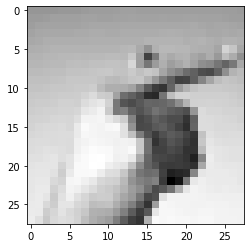

In [83]:
def to_image(array, label = True):
    # Reshape an array into an image format
    array = np.array(array)
    start_idx = 1 if label else 0
    return array[start_idx:].reshape(28,28).astype(float)
        
# Display one image
img = to_image(train_df.iloc[0])
plt.imshow(img, cmap = 'gray')
plt.show()

In [84]:
# The labels are coded in numbers. 
# Create a mapping to get the letters corresponding to the numbers
alphab = 'abcdefghijklmnopqrstuvwxyz'
mapping_letter = {}

for i,l in enumerate(alphab):
    mapping_letter[l] = i
mapping_letter = {v:k for k,v in mapping_letter.items()}

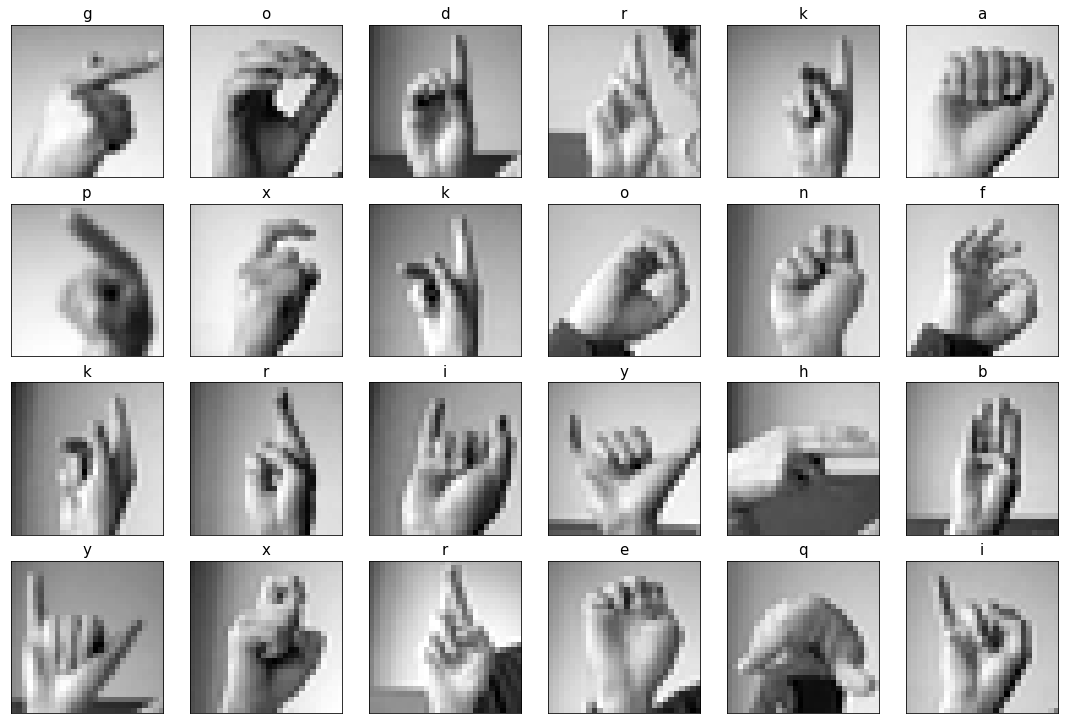

In [85]:
# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img = to_image(train_df.iloc[i])
    ax.imshow(img, cmap = 'gray')
    title = mapping_letter[train_df.Label[i]]
    ax.set_title(title, fontsize = 15)
plt.tight_layout(pad=0.5)
plt.show()

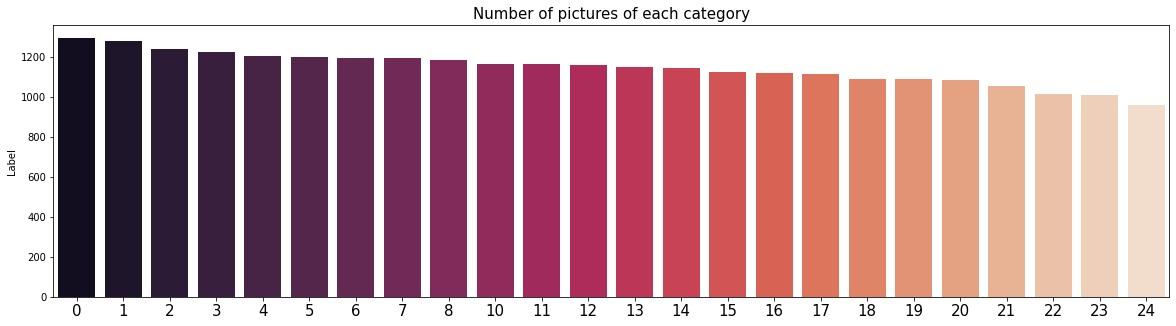

In [86]:
# Display the number of pictures of each letter
vc = train_df['Label'].value_counts()
plt.figure(figsize=(20,5))
sns.barplot(x = sorted(vc.index), y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()

In [87]:
train_df_original = train_df.copy()

# Split into training, test and validation sets
val_index = int(train_df.shape[0]*0.1)

train_df = train_df_original.iloc[val_index:]
val_df = train_df_original.iloc[:val_index]

y_train = train_df['Label']
y_val = val_df['Label']
y_test = test_df['Label']

# Reshape the traing and test set to use them with a generator
X_train = train_df.drop('Label',axis = 1).values.reshape(train_df.shape[0], 28, 28, 1)
X_val = val_df.drop('Label',axis = 1).values.reshape(val_df.shape[0], 28, 28, 1)
X_test = test_df.drop('Label',axis = 1).values.reshape(test_df.shape[0], 28, 28, 1)

In [88]:
# Display the shapes of the sets
X_train.shape, X_val.shape, X_test.shape

((24710, 28, 28, 1), (2745, 28, 28, 1), (7172, 28, 28, 1))

In [89]:
# Data augmentation
generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                            rotation_range=10,
                                                            zoom_range=0.10,
                                                            width_shift_range=0.1,
                                                            height_shift_range=0.1,
                                                            shear_range=0.1,
                                                            horizontal_flip=False,
                                                            fill_mode="nearest")

X_train_flow = generator.flow(X_train, y_train, batch_size=32)
X_val_flow = generator.flow(X_val, y_val, batch_size=32)
# X_test_flow = generator.flow(X_test, y_test)


In [90]:
model = Sequential([Conv2D(filters=32,  kernel_size=(3,3), activation="relu", input_shape=(28,28,1)),
                    MaxPool2D(2,2, padding='same'),
                    
                    Conv2D(filters=128,  kernel_size=(3,3), activation="relu"),
                    MaxPool2D(2,2, padding='same'),
                    
                    Conv2D(filters=512, kernel_size=(3,3), activation="relu"),
                    MaxPool2D(2,2, padding='same'),
                    
                    Flatten(),
                    
                    Dense(units=1024, activation="relu"),                 
                    Dense(units=256, activation="relu"),
                    Dropout(0.5),
                    Dense(units=25, activation="softmax")
])

model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 512)         590336    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 512)       

In [91]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

history = model.fit(X_train_flow, 
                    validation_data=X_val_flow, 
                    epochs=100,
                    callbacks=[
                            tf.keras.callbacks.EarlyStopping(
                            monitor='val_loss',
                            patience=5,
                            restore_best_weights=True), 
                        
                            learning_rate_reduction
                    ])

Epoch 1/100
773/773 [==============================] - 12s 15ms/step - loss: 1.8017 - accuracy: 0.4215 - val_loss: 0.5060 - val_accuracy: 0.8372 - lr: 0.0010
Epoch 2/100
773/773 [==============================] - 11s 15ms/step - loss: 0.3768 - accuracy: 0.8685 - val_loss: 0.1586 - val_accuracy: 0.9475 - lr: 0.0010
Epoch 3/100
773/773 [==============================] - 11s 15ms/step - loss: 0.1593 - accuracy: 0.9466 - val_loss: 0.0597 - val_accuracy: 0.9843 - lr: 0.0010
Epoch 4/100
773/773 [==============================] - 11s 15ms/step - loss: 0.0882 - accuracy: 0.9724 - val_loss: 0.0423 - val_accuracy: 0.9880 - lr: 0.0010
Epoch 5/100
773/773 [==============================] - 11s 15ms/step - loss: 0.0621 - accuracy: 0.9800 - val_loss: 0.0614 - val_accuracy: 0.9792 - lr: 0.0010
Epoch 6/100
773/773 [==============================] - 11s 15ms/step - loss: 0.0579 - accuracy: 0.9832 - val_loss: 0.0364 - val_accuracy: 0.9891 - lr: 0.0010
Epoch 7/100
773/773 [==============================]

In [92]:
model.save('/content/drive/My Drive/explo_2/model_explo.h5')

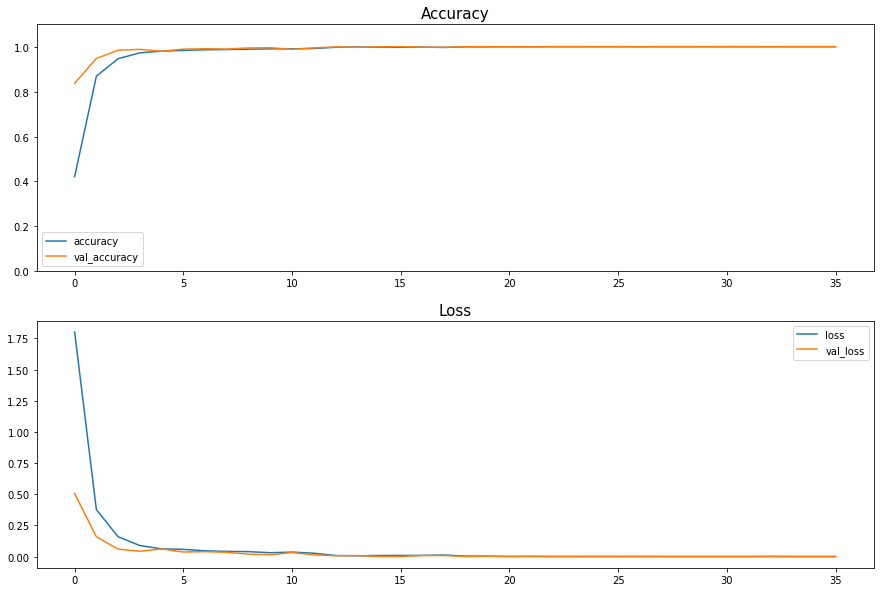

In [93]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
ax = axes.flat

pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot(ax=ax[0])
ax[0].set_title("Accuracy", fontsize = 15)
ax[0].set_ylim(0,1.1)

pd.DataFrame(history.history)[['loss','val_loss']].plot(ax=ax[1])
ax[1].set_title("Loss", fontsize = 15)
plt.show()

In [94]:
# Predict the label of the test_images
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)

# Get the accuracy score
acc = accuracy_score(y_test,pred)

# Display the results
printmd(f'## {acc*100:.2f}% accuracy on the test set')

## 99.58% accuracy on the test set

In [95]:
#  Map the numbers into letters
y_test_letters = [mapping_letter[x] for x in y_test]
pred_letters = [mapping_letter[x] for x in pred]

In [96]:
print(classification_report(y_test_letters,pred_letters))

              precision    recall  f1-score   support

           a       1.00      1.00      1.00       331
           b       1.00      1.00      1.00       432
           c       1.00      1.00      1.00       310
           d       1.00      1.00      1.00       245
           e       1.00      1.00      1.00       498
           f       1.00      1.00      1.00       247
           g       1.00      0.96      0.98       348
           h       0.97      1.00      0.99       436
           i       1.00      1.00      1.00       288
           k       1.00      1.00      1.00       331
           l       1.00      1.00      1.00       209
           m       1.00      1.00      1.00       394
           n       1.00      1.00      1.00       291
           o       1.00      1.00      1.00       246
           p       1.00      1.00      1.00       347
           q       1.00      1.00      1.00       164
           r       1.00      0.90      0.95       144
           s       0.94    

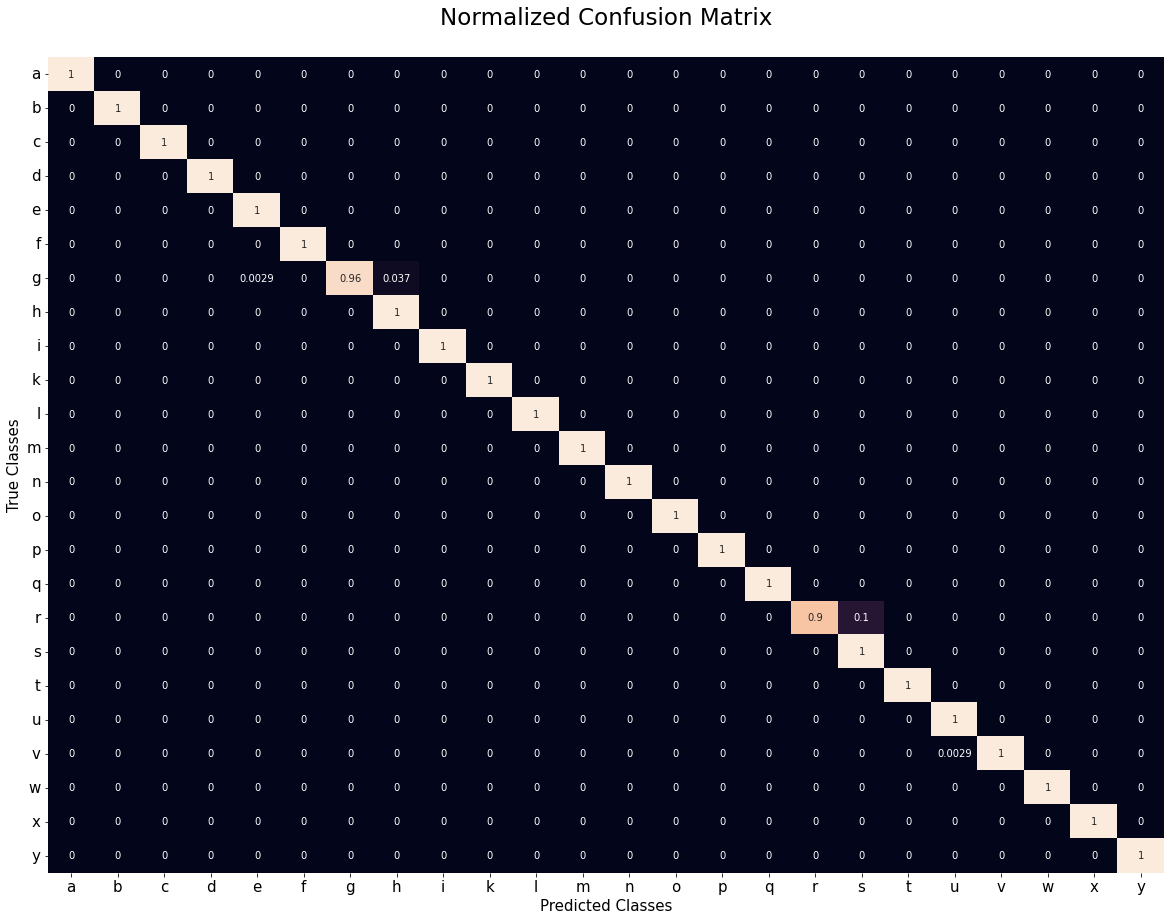

In [97]:
#  Display a confusion matrix
cf_matrix = confusion_matrix(y_test_letters, pred_letters, normalize='true')
plt.figure(figsize = (20,15))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test_letters)), yticklabels = sorted(set(y_test_letters)),cbar=False)
plt.title('Normalized Confusion Matrix\n', fontsize = 23)
plt.xlabel("Predicted Classes",fontsize=15)
plt.ylabel("True Classes",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15,rotation=0)
plt.show()
